# Short Essay Scoring
For these last session we are going to focus on scoring elementary reading comprehension exercices.

In [1]:
#First, let's import the nesseacary libraries
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1. Import the data and print some statistics 
more information about the data set can be found in:  https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset

In [2]:
df = pd.read_csv("short_essay_scoring.csv")
print ('the data frame has a shape :', df.shape)
print ('let\'s print the first five rows \n', df.head())

the data frame has a shape : (1500, 6)
let's print the first five rows 
    Unnamed: 0                                             answer  \
0           0  Destiny would be a good friend beacu like to r...   
1           1  I think Mr.Popper would disagree because he wa...   
2           2  i think that it has made me a better person be...   
3           3  A part that I could not stop reading was when ...   
4           4       its not as good as the any of the other ones   

                                       question_text  \
0  Would you enjoy being friends with the main ch...   
1  Which character do you think would disagree wi...   
2  Do you think reading this text has made you a ...   
3  Tell us about one part of this book that total...   
4  Does this book remind you of the last book you...   

                      text_id  grade  score  
0   AUTJfAnEIe5XGTq1jvkynEr-Q      3      7  
1  BASEvlmqaEWAE9oL3mOT2KG9JQ      3      9  
2  BASEAOH8j3w9WsZOxNQ9dzAUFQ      5      8

In [3]:
print (df.info())
print (df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     1500 non-null   int64 
 1   answer         1500 non-null   object
 2   question_text  1500 non-null   object
 3   text_id        1500 non-null   object
 4   grade          1500 non-null   int64 
 5   score          1500 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 70.4+ KB
None
        Unnamed: 0        grade        score
count  1500.000000  1500.000000  1500.000000
mean    749.500000     3.453333     6.930667
std     433.157015     2.343107     2.794590
min       0.000000    -1.000000     0.000000
25%     374.750000     2.000000     6.000000
50%     749.500000     3.000000     8.000000
75%    1124.250000     5.000000     9.000000
max    1499.000000     8.000000    10.000000


## 2. A little bit about processing text data (NLP)
https://www.nltk.org

In [4]:
#nltk sentence tokenizer, word tokenizer, pos tagger, lemmatizer, ngrams
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /Users/benzinho/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/benzinho/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/benzinho/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
# WORD TOKENIZER
from nltk.tokenize import word_tokenize

sentence = "This is a sentence.this we'll do"
tokens = word_tokenize(sentence)

print(sentence.split())
print(tokens)

['This', 'is', 'a', 'sentence.this', "we'll", 'do']
['This', 'is', 'a', 'sentence.this', 'we', "'ll", 'do']


In [6]:
# SENT TOKENIZER
from nltk.tokenize import sent_tokenize

sentences = 'These are multiple sentences. I know it is MR. sentence man. Do you understand? I do! It is true. Harry said "I like Quidditch"'
sents = sent_tokenize(sentences)

print(sents)

['These are multiple sentences.', 'I know it is MR. sentence man.', 'Do you understand?', 'I do!', 'It is true.', 'Harry said "I like Quidditch"']


In [7]:
# PART OF SPEECH TAGGING
tagged = nltk.pos_tag(tokens)
tagged

[('This', 'DT'),
 ('is', 'VBZ'),
 ('a', 'DT'),
 ('sentence.this', 'NN'),
 ('we', 'PRP'),
 ("'ll", 'MD'),
 ('do', 'VB')]

In [8]:
# STOPWORDS
from nltk.corpus import stopwords 
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [9]:
# NGRAMS
from nltk import ngrams

n = 2
bigrams = ngrams(tokens, n)
print([gram for gram in bigrams])

n = 4
quadgrams = ngrams(tokens, n)
print([gram for gram in quadgrams])

question = "Who is the main character?"
answer = "The main character is Harry Potter. He is an orphan."

n = 3
trigram_question = ngrams(word_tokenize(question), n)
trigram_answer = ngrams(word_tokenize(answer), n)
print("======================================")
print([gram for gram in trigram_question])
print([gram for gram in trigram_answer])

[('This', 'is'), ('is', 'a'), ('a', 'sentence.this'), ('sentence.this', 'we'), ('we', "'ll"), ("'ll", 'do')]
[('This', 'is', 'a', 'sentence.this'), ('is', 'a', 'sentence.this', 'we'), ('a', 'sentence.this', 'we', "'ll"), ('sentence.this', 'we', "'ll", 'do')]
[('Who', 'is', 'the'), ('is', 'the', 'main'), ('the', 'main', 'character'), ('main', 'character', '?')]
[('The', 'main', 'character'), ('main', 'character', 'is'), ('character', 'is', 'Harry'), ('is', 'Harry', 'Potter'), ('Harry', 'Potter', '.'), ('Potter', '.', 'He'), ('.', 'He', 'is'), ('He', 'is', 'an'), ('is', 'an', 'orphan'), ('an', 'orphan', '.')]


In [10]:
# TFIDF Term Frequency Inverse Document Frequency TF / DF
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = ["Add one potatoe and tomato to the pan",
"peel the potatoe and mix with the tomato",
"Bake tomato in a pot for 350 degrees",
"Bake potatoe in a pot for 350 degrees",
"Bake cookies with the tomato and add a tomato on the computer"]

vectorizer = TfidfVectorizer(stop_words="english")
X = vectorizer.fit_transform(corpus)

for r in range(len(corpus)):
    print("ROW " + str(r) + " - " + corpus[r])
    for z in zip(vectorizer.get_feature_names(), X[r,:].toarray()[0]):
        if z[1] > 0:
            print(z)
#print(X[0,:].toarray()[0])

ROW 0 - Add one potatoe and tomato to the pan
('add', 0.5189666820949349)
('pan', 0.6432458258552362)
('potatoe', 0.43078922631751043)
('tomato', 0.36239347798208316)
ROW 1 - peel the potatoe and mix with the tomato
('mix', 0.6012854497921586)
('peel', 0.6012854497921586)
('potatoe', 0.40268787343866097)
('tomato', 0.338753734033932)
ROW 2 - Bake tomato in a pot for 350 degrees
('350', 0.4893109154841178)
('bake', 0.406172261115514)
('degrees', 0.4893109154841178)
('pot', 0.4893109154841178)
('tomato', 0.3416849107944251)
ROW 3 - Bake potatoe in a pot for 350 degrees
('350', 0.47792215686353867)
('bake', 0.39671856267176947)
('degrees', 0.47792215686353867)
('pot', 0.47792215686353867)
('potatoe', 0.39671856267176947)
ROW 4 - Bake cookies with the tomato and add a tomato on the computer
('add', 0.385984634633335)
('bake', 0.3204021141644773)
('computer', 0.4784180056991261)
('cookies', 0.4784180056991261)
('tomato', 0.5390647184815994)


In [11]:
vectorizer = TfidfVectorizer(stop_words="english")
X_answer = vectorizer.fit(df['answer'])
print(len(X_answer.get_feature_names()))
corpus = ["my favorite character was Mr. Robot because he is involved in a lor of shenanigans."]

result = vectorizer.transform(corpus)
for r in range(len(corpus)):
    print("ROW " + str(r) + " - " + corpus[r])
    for z in zip(vectorizer.get_feature_names(), result[r,:].toarray()[0]):
        if z[1] > 0:
            print(z)

4889
ROW 0 - my favorite character was Mr. Robot because he is involved in a lor of shenanigans.
('character', 0.28315590918029804)
('favorite', 0.3643658344593652)
('involved', 0.5861439619560898)
('mr', 0.46100353187270615)
('robot', 0.4805947037143858)


### (Pre-processing)

In [12]:
from nltk.stem.lancaster import LancasterStemmer
st = LancasterStemmer()

stemmed = [st.stem(answer) for answer in df.answer]
df.answer = stemmed

df.head()

,Unnamed: 0,answer,question_text,text_id,grade,score
0,0,destiny would be a good friend beacu like to r...,Would you enjoy being friends with the main ch...,AUTJfAnEIe5XGTq1jvkynEr-Q,3,7
1,1,i think mr.popper would disagree because he wa...,Which character do you think would disagree wi...,BASEvlmqaEWAE9oL3mOT2KG9JQ,3,9
2,2,i think that it has made me a better person be...,Do you think reading this text has made you a ...,BASEAOH8j3w9WsZOxNQ9dzAUFQ,5,8
3,3,a part that i could not stop reading was when ...,Tell us about one part of this book that total...,AUToHuz362h0RJY-hPa7O6MDw,3,9
4,4,its not as good as the any of the other one,Does this book remind you of the last book you...,BASEasfHPZhAW77njjMyzqLqOw,1,3


## 3. Looking at length
Here we are going to create a new feature called length and visualize it's relationship with our target

In [13]:
df['length'] = [len(answer) for answer in df.answer]

Text(0.5, 1.0, 'Char Length vs. Score')

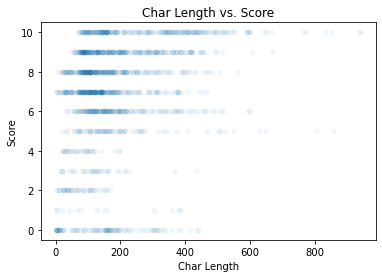

In [14]:
fig = plt.figure(figsize=(6, 4))
fig.clf()
ax = fig.gca()
df.plot(kind = 'scatter', x = 'length', y = 'score', ax = ax, alpha = 0.05)
ax.set_xlabel('Char Length')
ax.set_ylabel('Score')
ax.set_title('Char Length vs. Score')

In [15]:
from sklearn.model_selection import train_test_split
# your code here
X_train, X_test, y_train, y_test = train_test_split(np.array(df['length']).reshape(-1,1), df["score"], test_size=0.3, random_state=1)

print ("train shape", X_train.shape, y_train.shape)
print ("test shape", X_test.shape, y_test.shape)

train shape (1050, 1) (1050,)
test shape (450, 1) (450,)


In [16]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)

train_score = reg.score(X_train, y_train)
test_score = reg.score(X_test, y_test)
print  ('train score =' , train_score)
print  ('test score = {}'.format(test_score))

train score = 0.07711915752233411
test score = 0.021734497392087326


## 4. Feature Engineering
Create at least 3 different features

In [17]:
###Number of sentences
from nltk.tokenize import sent_tokenize
df["nb_sentence"]=0 

for i in range(1500):
    sents = sent_tokenize(df.iloc[i].answer)
    df.iloc[i,-1] = len(sents)


In [18]:
# number of words
from nltk.tokenize import RegexpTokenizer

df["nb_words"]=0
tokenizer = RegexpTokenizer(r'\w+')

for i in range(1500):
    tokens = tokenizer.tokenize(df.iloc[i].answer)
    df.iloc[i,-1] = len(tokens)
    

In [19]:
## lexical richness

df["richness"]=0

for i in range(1500):
    answer = df.iloc[i].answer
    richness = len(set(answer)) / len(answer)
    df.iloc[i,-1] = richness



In [20]:
## vocab_size

df["vocab_size"]=0

for i in range(1500):
    answer = df.iloc[i].answer
    vocab_size = len(set(answer))
    df.iloc[i,-1] = vocab_size



In [21]:
## mots en commun entre la question et la réponse.

from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize  
  
stop_words = set(stopwords.words('english'))  
df["wordcommun"]=0

for i in range(len(df)):
    question = df.question_text[i]
    answer= df.answer[i]
    
    word_tokens_q = word_tokenize(question)  
    word_tokens_a = word_tokenize(answer)  
    
    filtered_question = [w for w in word_tokens_q if not w in stop_words]  
    filtered_question = []  
  
    for w in word_tokens_q:  
        if w not in stop_words:  
            filtered_question.append(w) 
            
    filtered_answer = [w for w in word_tokens_a if not w in stop_words]  
    filtered_answer = []  
  
    for w in word_tokens_a:  
        if w not in stop_words:  
            filtered_answer.append(w) 
    
    a=0
    for s in filtered_answer:
        if s in filtered_question:
            a=a+1
    df.wordcommun[i]=a


## 5. Visualize the data
Create at least 3 graphs visualizing your features with respect to the target

In [22]:
df.describe()

,Unnamed: 0,grade,score,length,nb_sentence,nb_words,richness,vocab_size,wordcommun
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,749.500000,3.453333,6.930667,187.592667,1.905333,35.708667,0.182209,21.854667,3.166667
std,433.157015,2.343107,2.794590,134.593654,1.546383,26.241472,0.145342,5.326956,3.575763
min,0.000000,-1.000000,0.000000,2.000000,1.000000,1.000000,0.003135,1.000000,0.000000
25%,374.750000,2.000000,6.000000,97.000000,1.000000,18.000000,0.092587,21.000000,1.000000
50%,749.500000,3.000000,8.000000,148.000000,1.000000,29.000000,0.151707,23.000000,2.000000
75%,1124.250000,5.000000,9.000000,248.000000,2.000000,46.000000,0.216981,25.000000,4.000000
max,1499.000000,8.000000,10.000000,942.000000,15.000000,170.000000,1.000000,35.000000,24.000000


Text(0.5, 1.0, 'Nb Sentence vs. Score')

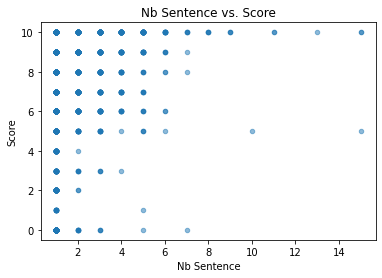

In [23]:
fig = plt.figure(figsize=(6, 4))
fig.clf()
ax = fig.gca()
df.plot(kind = 'scatter', x = 'nb_sentence', y = 'score', ax = ax, alpha = 0.5)
ax.set_xlabel('Nb Sentence')
ax.set_ylabel('Score')
ax.set_title('Nb Sentence vs. Score')


Text(0.5, 1.0, 'nb_words VS score')

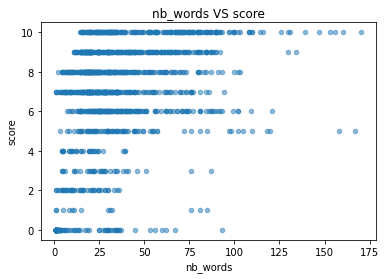

In [24]:
fig = plt.figure(figsize=(6, 4))
fig.clf()
ax = fig.gca()
df.plot(kind = 'scatter', x = 'nb_words', y = 'score', ax = ax, alpha = 0.5)
ax.set_xlabel('nb_words')
ax.set_ylabel('score')
ax.set_title('nb_words VS score')


Text(0.5, 1.0, 'richness VS score')

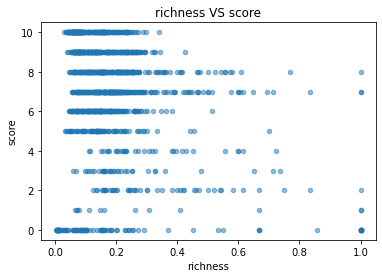

In [25]:
fig = plt.figure(figsize=(6, 4))
fig.clf()
ax = fig.gca()
df.plot(kind = 'scatter', x = 'richness', y = 'score', ax = ax, alpha = 0.5)
ax.set_xlabel('richness')
ax.set_ylabel('score')
ax.set_title('richness VS score')


Text(0.5, 1.0, 'vocab_size VS score')

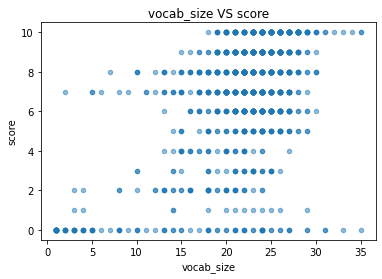

In [26]:
fig = plt.figure(figsize=(6, 4))
fig.clf()
ax = fig.gca()
df.plot(kind = 'scatter', x = 'vocab_size', y = 'score', ax = ax, alpha = 0.5)
ax.set_xlabel('vocab_size')
ax.set_ylabel('score')
ax.set_title('vocab_size VS score')


Text(0.5, 1.0, 'wordcommun VS score')

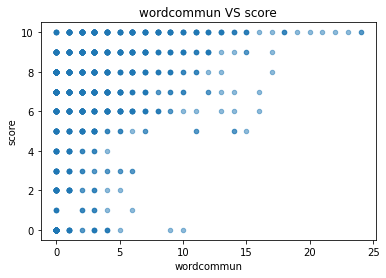

In [27]:
fig = plt.figure(figsize=(6, 4))
fig.clf()
ax = fig.gca()
df.plot(kind = 'scatter', x = 'wordcommun', y = 'score', ax = ax, alpha = 0.5)
ax.set_xlabel('wordcommun')
ax.set_ylabel('score')
ax.set_title('wordcommun VS score')


## 6. Model Training
Pick a model, fit your features and print performance metrics

### Logisitic Regression

In [40]:
from sklearn.linear_model import LogisticRegression

#features = ["grade"] #0,19
#features = ["length"] #0,22
#features = ["nb_sentence"] #0,22
#features = ["nb_words"] #0,25
#features = ["richness"] #0,17
#features = ["vocab_size"] #0,25
#features = ["wordcommun"] #0,24

#features = ["nb_words", "vocab_size"] #0,23
#features = ["nb_words", "vocab_size", "wordcommun"] #0,24
#features = ["grade", "nb_words", "vocab_size", "wordcommun"] #0,32
#features = ["grade", "nb_words", "wordcommun"] #0,32

features = ["grade", "length", "nb_sentence", "nb_words", "richness", "vocab_size", "wordcommun"] #0,33


X_train, X_test, y_train, y_test = train_test_split(df[features], df["score"], test_size=0.3, random_state=1)

reg = LogisticRegression(random_state=1)
reg.fit(X_train, y_train)


LogisticRegression(random_state=1)

In [41]:
train_score = reg.score(X_train, y_train)
test_score = reg.score(X_test, y_test)
print  ('train score =' , train_score)
print  ('test score = {}'.format(test_score))


train score = 0.37047619047619046
test score = 0.3288888888888889


### Random Forest Classifier w/ Grid Search

In [30]:
df.head()

,Unnamed: 0,answer,question_text,text_id,grade,score,length,nb_sentence,nb_words,richness,vocab_size,wordcommun
0,0,destiny would be a good friend beacu like to r...,Would you enjoy being friends with the main ch...,AUTJfAnEIe5XGTq1jvkynEr-Q,3,7,103,1,21,0.213592,22,0
1,1,i think mr.popper would disagree because he wa...,Which character do you think would disagree wi...,BASEvlmqaEWAE9oL3mOT2KG9JQ,3,9,215,2,42,0.120930,26,4
2,2,i think that it has made me a better person be...,Do you think reading this text has made you a ...,BASEAOH8j3w9WsZOxNQ9dzAUFQ,5,8,149,1,31,0.140940,21,5
3,3,a part that i could not stop reading was when ...,Tell us about one part of this book that total...,AUToHuz362h0RJY-hPa7O6MDw,3,9,146,1,30,0.150685,22,5
4,4,its not as good as the any of the other one,Does this book remind you of the last book you...,BASEasfHPZhAW77njjMyzqLqOw,1,3,43,1,11,0.325581,14,0


In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

y = df.iloc[:,[5]]
#X = df.iloc[:,[4,8,11]] #0,353 
X = df.iloc[:,[4,6,7,8,9,10,11]] #0,386 => 0,395 w/ stemming

params = {'min_samples_leaf':list(range(1,5)),'min_samples_split':list(range(2,10,2)),
          'n_estimators':list(range(10,50,10))}

clf_rf=RandomForestClassifier(random_state=1)
clf_gs=GridSearchCV(clf_rf, params, scoring = 'accuracy', cv=5)
clf_gs.fit(X, y)

best_param = clf_gs.best_params_

clf_rf1 = RandomForestClassifier(random_state=1,min_samples_leaf= best_param['min_samples_leaf'],min_samples_split=best_param['min_samples_split'], n_estimators=best_param['n_estimators'])
clf_rf1.fit(X,y)

RandomForestClassifier(min_samples_leaf=2, min_samples_split=8, n_estimators=40,
                       random_state=1)

In [45]:
scores_rf1 = cross_val_score(clf_rf1, X, y, scoring='accuracy', cv=5)
print('cross validation accuracy =', np.mean(scores_rf1))


cross validation accuracy = 0.39533333333333337


## 7. RESULT INTERPRETATION
Look at parameters, print or visualize predictions

In [33]:
## CODE

In [34]:
## Written interpretation. I think length helped the model but we could have better results by..


## 8. Second interation improvement


In [35]:
## NEW FEATURE ENGINEERING

In [36]:
## NEW MODEL TRAINING

In [37]:
## NEW PERFORMANCE ASSESMENT